In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
run=0
vector_size1=300
vector_size2 = 100
diter=5
siter=5
diter2=9
siter2=1
iterations=10
no_rows = 'all'

In [3]:
run = 0
iterations=10
diter=5
siter=5
vector_size = 300
no_rows = 'all'

all_dfs = {}
compass_df, compass_fc_df, goldberg_df, procrustes_df, hamilton_df = [pd.DataFrame()] * 5
dataframes = compass_df, compass_fc_df, goldberg_df, procrustes_df, hamilton_df

df_names = [
    'compass',
    'compass_fc',
    'goldberg', 
    'procrustes', 
    'hamilton'
]

basenames = [
    'stability_compass',
    'stability_compass_freq_cutoffs',
    'stability_goldberg',
    'stability_procrustes',
    'stability_hamilton'
]

descriptions = [
    'Compass', 
    'NN',
    'Compass with frequency cut-offs',
    'Orthogonal Procrustes',
    'Second-Order Similarity'
]

In [4]:
for (i, (df_name, basename, description)) in enumerate(zip(df_names, basenames, descriptions)):
    if i < 2:
        filename = (f'../out_files/{basename}_run{run}_iterations{iterations}'
                    f'_diter{diter}_siter{siter}_size{vector_size}_rows{no_rows}.csv')
    else:
        filename = (f'../out_files/{basename}_run{run}_iterations{iterations}'
                    f'_size{vector_size}_rows{no_rows}.csv')
    print('reading', filename, end='...')
    df = pd.read_csv(filename)
    all_dfs[df_name] = {
        'df': df,
        'description': description
    }
    print('read', df.shape)

reading ../out_files/stability_compass_run0_iterations10_diter5_siter5_size300_rowsall.csv...read (1292860, 7)
reading ../out_files/stability_compass_freq_cutoffs_run0_iterations10_diter5_siter5_size300_rowsall.csv...read (104440, 7)
reading ../out_files/stability_goldberg_run0_iterations10_size300_rowsall.csv...read (104430, 6)
reading ../out_files/stability_procrustes_run0_iterations10_size300_rowsall.csv...read (415830, 7)
reading ../out_files/stability_hamilton_run0_iterations10_size300_rowsall.csv...read (415830, 8)


In [6]:
all_dfs['compass']['df'].rename(
    columns={
        'top10neighbors_1st_decade': 'neighbors_t1', 
        'top10neighbors_2nd_decade': 'neighbors_t2'},
    inplace=True)
all_dfs['compass']['df'].head()

,iteration,decade_pair,word,semantic_similarity,common_voc_size,neighbors_t1,neighbors_t2
0,8,"(1990, 2010)",6744,-0.763507,129286,"[('τζελεπης', 0.8531546592712402), ('τογιας', ...","[('5050', 0.9832332134246826), ('4742', 0.9830..."
1,7,"(1990, 2010)",helsinki,-0.753964,129286,"[('3841', 0.6824641227722168), ('ουγκο', 0.660...","[('operational', 0.8921221494674683), ('2222',..."
2,9,"(1990, 2010)",παπαλεξης,-0.729953,129286,"[('μασημενη', 0.8540835380554199), ('κολοβος',...","[('σαραφοπουλου', 0.8426071405410767), ('εξαιρ..."
3,3,"(1990, 2010)",3583,-0.717180,129286,"[('θεοφυλακτος', 0.9119833707809448), ('εξεγερ...","[('4890', 0.7063192129135132), ('2632', 0.7005..."
4,0,"(1990, 2010)",νερομανα,-0.712117,129286,"[('κληροδοτειτε', 0.7492071390151978), ('σταχυ...","[('πλαγιος', 0.8843453526496887), ('υπαινικτικ..."


In [7]:
all_dfs['compass_fc']['df'].rename(
    columns={
        'top10neighbors_1st_decade': 'neighbors_t1', 
        'top10neighbors_2nd_decade': 'neighbors_t2'},
    inplace=True)
all_dfs['compass_fc']['df'].head()

,iteration,decade_pair,word,semantic_similarity,neighbors_t1,neighbors_t2,common_voc_size
0,1,"(1990, 2010)",φαρμακη,0.133329,"[('σκουλακη', 0.8623967170715332), ('φλωρο', 0...","[('γκεκη', 0.7360190153121948), ('αικατερινη',...",129286
1,4,"(1990, 2010)",φαρμακη,0.149365,"[('τριαριδη', 0.8534873723983765), ('φλωρο', 0...","[('αικατερινη', 0.7807173728942871), ('γκεκη',...",129286
2,5,"(1990, 2010)",φαρμακη,0.165065,"[('σκουλακη', 0.85692298412323), ('φλωρο', 0.8...","[('γκεκη', 0.7588277459144592), ('αικατερινη',...",129286
3,8,"(1990, 2010)",φαρμακη,0.166510,"[('σκουλακη', 0.846733808517456), ('τριαριδη',...","[('αικατερινη', 0.7419882416725159), ('γκεκη',...",129286
4,0,"(1990, 2010)",φαρμακη,0.168974,"[('σκουλακη', 0.8731490969657898), ('φλωρο', 0...","[('γκεκη', 0.7620425224304199), ('αικατερινη',...",129286


In [8]:
all_dfs['goldberg']['df'].rename(
    columns={
        'score': 'semantic_similarity', 
        'decade':'decade_pair'},
    inplace=True)
all_dfs['goldberg']['df'].head()

,iteration,decade_pair,word,semantic_similarity,neighbors_t1,neighbors_t2
0,5,1990-2010,απλοι,-832,"['σημερινοι', 'εντιμοι', 'εμπειροι', 'τολμουν'...","['πραγματικοι', 'σημερινοι', 'εντιμοι', 'εμπει..."
1,1,1990-2010,απλοι,-828,"['σημερινοι', 'εμπειροι', 'τολμουν', 'εντιμοι'...","['πραγματικοι', 'εντιμοι', 'σημερινοι', 'εμπει..."
2,1,1990-2010,αρνουνται,-828,"['αρνηθηκαν', 'κληθουν', 'σπευδουν', 'επιθυμου...","['αρνηθηκαν', 'αποφευγουν', 'σπευδουν', 'δεχθο..."
3,8,1990-2010,απλοι,-827,"['σημερινοι', 'εντιμοι', 'τολμουν', 'εμπειροι'...","['εντιμοι', 'πραγματικοι', 'σημερινοι', 'εμπει..."
4,5,1990-2010,απαντησετε,-826,"['απαντηστε', 'απαντατε', 'απαντησατε', 'αναφε...","['απαντατε', 'απαντηστε', 'τοποθετηθειτε', 'απ..."


In [9]:
all_dfs['procrustes']['df'].rename(
    columns={
        'top10neighbors_1st_decade': 'neighbors_t1', 
        'top10neighbors_2nd_decade': 'neighbors_t2'},
    inplace=True)
all_dfs['procrustes']['df'].head()

,iteration,decade_pair,word,semantic_similarity,common_voc_size,neighbors_t1,neighbors_t2
0,5,"(1990, 2010)",µονο,-0.125530,41583,"[('µας', 0.5727941393852234), ('σηµερα', 0.561...","[('∆@sw', 0.5481138229370117), ('εχουµε', 0.52..."
1,6,"(1990, 2010)",κεδε,-0.105783,41583,"[('καταστρατηγουνται', 0.673636794090271), ('δ...","[('κεδκε', 0.8241174817085266), ('εναε', 0.643..."
2,7,"(1990, 2010)",εντελει,-0.097506,41583,"[('διανοηθειτε', 0.6556393504142761), ('ακριβο...","[('τελει', 0.5776068568229675), ('προφανη', 0...."
3,7,"(1990, 2010)",ντου,-0.095774,41583,"[('παθολογου', 0.8109667897224426), ('παιδιατρ...","[('πλακακια', 0.6834608316421509), ('μνημοσυνα..."
4,6,"(1990, 2010)",µονο,-0.093061,41583,"[('σηµερα', 0.6305976510047913), ('µια', 0.598...","[('∆@sw', 0.570103108882904), ('σηµερα', 0.522..."


In [10]:
all_dfs['hamilton']['df'].rename(
    columns={
        'decade':'decade_pair', 
        'top25neighbors_1st_decade': 'neighbors_t1',                        
        'top25neighbors_2nd_decade':' neighbors_t2'},
    inplace=True)
all_dfs['hamilton']['df'].head()

,iteration,decade_pair,word,semantic_similarity,common_vocab,neighbors_t1,neighbors_t2,neighbors_union
0,9,1990-2010,est,1.000000,41583,"['qui', 'une', 'dans', 'partie', 'ιtre', 'que'...","['τσωρτσιλ', 'τσορτσιλ', 'σαιξπηρ', 'πρετεντερ...",1
1,0,1990-2010,κωνσταντοπουλε,0.999693,41583,"['κανελλοπουλε', 'ζαφειροπουλε', 'καραμαριε', ...","['παναγιωτοπουλε', 'λαγε', 'συρμαλενιε', 'βεσυ...",3
2,0,1990-2010,est,0.999682,41583,"['dans', 'qui', 'ces', 'autres', 'gγnγral', 'ι...","['τσωρτσιλ', 'τσορτσιλ', 'γκαντι', 'ουγκω', 'κ...",3
3,6,1990-2010,κωνσταντοπουλε,0.999657,41583,"['γαλανε', 'γαλενιανε', 'σταθοπουλε', 'σωτηροπ...","['βεσυροπουλε', 'λαγε', 'παναγιωτοπουλε', 'συρ...",2
4,3,1990-2010,12,0.999537,41583,"['11', '9', '7', '14', '10', '21', '13', '16',...","['11', '9', '10', '14', '8', '13', '7', '6', '...",26


[10, 20, 50, 100, 200, 500, 1000] [0.5088888888888888, 0.6411111111111112, 0.7111111111111111, 0.7724444444444446, 0.7795555555555556, 0.8336444444444443, 0.8441555555555554] [[0.20888888888888885, 0.09111111111111114, 0.06711111111111112, 0.03244444444444461, 0.023555555555555552, 0.013644444444444348, 0.011355555555555452], [0.19111111111111112, 0.10888888888888881, 0.04888888888888887, 0.03755555555555545, 0.02444444444444449, 0.01195555555555572, 0.014244444444444504]]
[10, 20, 50, 100, 200, 500, 1000] [0.66, 0.7077777777777777, 0.7711111111111109, 0.7853333333333335, 0.8232222222222224, 0.8498222222222221, 0.8695777777777778] [[0.06000000000000005, 0.10777777777777775, 0.051111111111110885, 0.05533333333333357, 0.023222222222222366, 0.011822222222222178, 0.00917777777777784], [0.14, 0.09222222222222232, 0.04888888888888909, 0.04266666666666641, 0.026777777777777567, 0.012177777777777843, 0.009022222222222265]]
[10, 20, 50, 100, 200, 500, 1000] [0.8355555555555556, 0.85666666666666

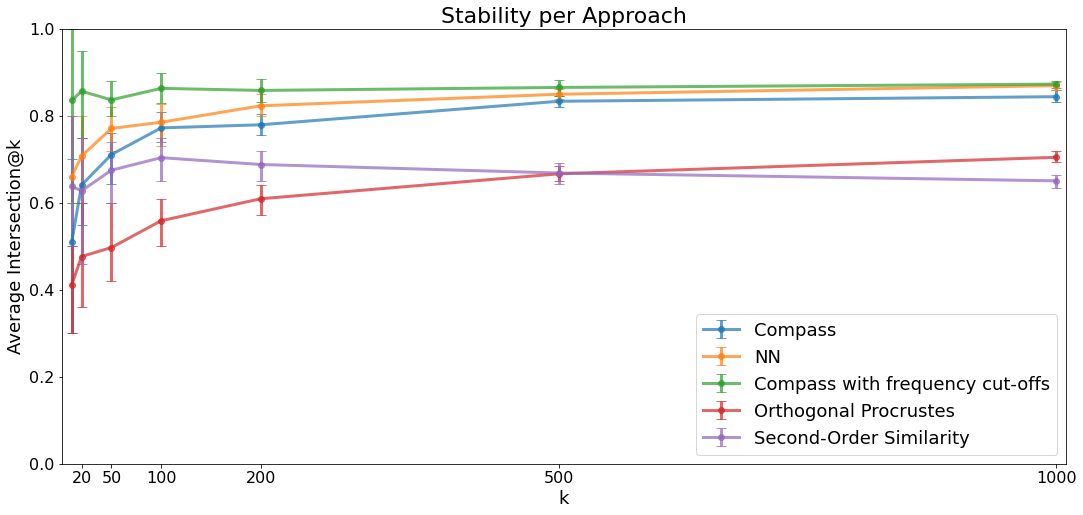

In [11]:
fig = plt.figure(figsize=(18, 8))

k = [10, 20, 50, 100, 200, 500, 1000]

all_pairs = list(itertools.combinations(range(iterations), 2))

for method_name, method_results in all_dfs.items():    
    label = method_results['description']
    df = method_results['df']
    X = []
    Y = []
    yerr = [
        [], # lower errors
        [] # upper errors
    ]
    
    for n in k:
        intersection_per_pair = np.zeros(len(all_pairs))

        for i, pair in enumerate(all_pairs):
            iteration_0_topk = df.loc[(df.iteration==pair[0])].sort_values('semantic_similarity', ascending=False)['word'][:n]
            iteration_1_topk = df.loc[(df.iteration==pair[1])].sort_values('semantic_similarity', ascending=False)['word'][:n]
            intersection = len(set(iteration_0_topk).intersection(set(iteration_1_topk)))
            intersection_per_pair[i] = intersection / n

        intersection_at_k = np.mean(intersection_per_pair)
        Y.append(intersection_at_k)
        X.append(n)
        yerr[0].append(intersection_at_k - np.quantile(intersection_per_pair, q=.05))
        yerr[1].append(np.quantile(intersection_per_pair, q=.95) - intersection_at_k)

    print(X, Y, yerr)

    plt.errorbar(X, Y, yerr=yerr, label=label, linewidth=3, alpha=0.7, 
                 fmt='-o', solid_capstyle='projecting', capsize=5)

plt.legend(loc=4, prop={'size': 18})
    
plt.gca().tick_params(axis='both', which='major', labelsize=16)
plt.ylim(0,1.)
plt.xlim(0,1010)
plt.xticks(k[1:])
plt.xlabel('k', fontsize=18)
plt.ylabel('Average Ιntersection@k', fontsize=18)
plt.title('Stability per Approach', fontsize=22)

plt.savefig('../out_files/stability_comparison.png', dpi=200,  bbox_inches='tight')